In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Setting the working directory
os.chdir("C:/Users/user/Desktop/edWisor/Project/Santander")

In [3]:
#Checking the working directory
os.getcwd()

'C:\\Users\\user\\Desktop\\edWisor\\Project\\Santander'

In [4]:
#Loading the Data
train = pd.read_csv("train - copy.csv")
test = pd.read_csv("test - copy.csv")

In [5]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [9]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [11]:
#Count of unique values in a column
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [12]:
print("There are {}% target values with 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

There are 10.049% target values with 1


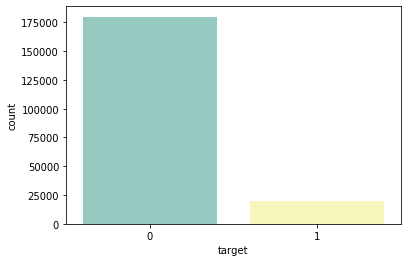

In [13]:
sns.countplot(train['target'], palette='Set3')

In [14]:
#The data is biased towards target value 1.

# MISSING VALUE ANALYSIS

In [15]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

In [16]:
#Resetting index
missing_val = missing_val.reset_index()

In [17]:
#Renaming variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [18]:
#Calculating percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

In [19]:
#Rearranging in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [20]:
#Saving the output results 
#missing_val.to_csv("Miising_perc_python.csv", index = False)

# OUTLIER ANALYSIS

In [21]:
df = train.copy()
#marketing_train = df.copy()

In [22]:
train_OA= train.drop(['ID_code','target'], axis = 1)

In [23]:
# #Detecting and deleting the outliers from data
for i in train_OA:
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    train = train.drop(train[train.loc[:,i] < min].index)
    train = train.drop(train[train.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888612499999997
10.507087499999999
var_2
3.031512499999998
18.207612500000003
var_3
0.6484500000000004
12.929649999999999
var_4
6.3163750000000025
15.827774999999997
var_5
-29.38955
19.11405
var_6
2.9145000000000008
7.856099999999998
var_7
6.206024999999997
26.839825000000005
var_8
-10.2005625
10.8209375
var_9
3.6705499999999995
11.53255
var_10
-15.5628
16.3516
var_11
-20.0544
13.399200000000002
var_12
13.488700000000001
14.569499999999998
var_13
-5.730549999999998
23.077849999999998
var_14
0.5459000000000014
14.504299999999999
var_15
13.345000000000002
15.792199999999998
var_16
2.048700000000002
16.4591
var_17
-24.981524999999998
13.696475
var_18
-8.5675
38.7573
var_19
-11.95475
36.660849999999996
var_20
-5.251424999999999
31.758375
var_21
-5.760100000000001
40.4015
var_22
-3.984325000000001
12.459875
var_23
1.4802499999999994
4.557450000000001
var_24
-1.1814875000000011
22.2772125
var_25
12.845600000000001
14.4744
var_26
-20.6719375
12.258

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175073 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 271.1+ MB


# CORRELATION ANALYSIS

In [25]:
##Correlation analysis
#Correlation plot
df_corr = train_OA

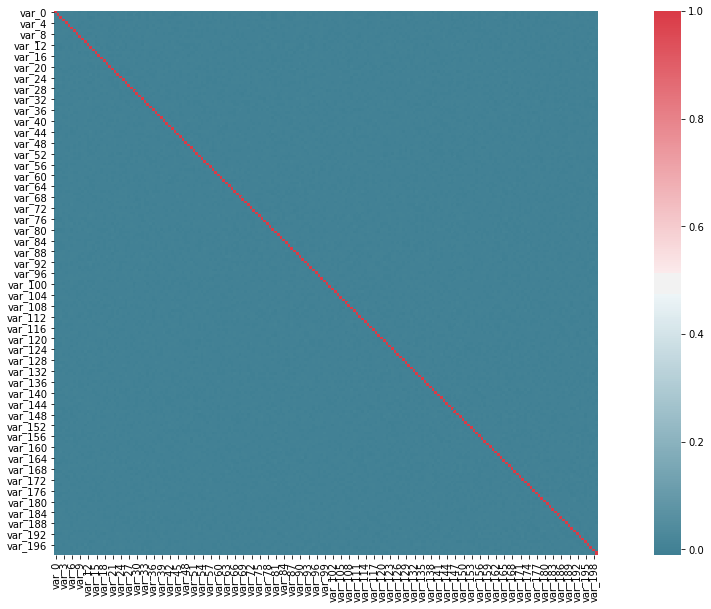

In [26]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [27]:
#Since, there is a very little or no correlation among the variables, we don't need to remove any variables.

# LOGISTIC REGRESSION

In [28]:
#Creating logistic data. Saving the target variable first
train_logit = pd.DataFrame(train['target'])

In [29]:
#Adding continous variables
train_logit = train_logit.join(train_OA)

In [30]:
train_logit.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [31]:
Sample_Index = np.random.rand(len(train_logit)) < 0.8

train_data = train_logit[Sample_Index]
test_data = train_logit[~Sample_Index]

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140169 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 216.0 MB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34904 entries, 9 to 199992
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 53.8 MB


In [34]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [35]:
#Selecting column indexes for independent variables
train_cols = train.columns[2:202]

In [36]:
#Logistic Regression
logit = sm.Logit(train_data['target'], train_data[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.227424
         Iterations 8


In [37]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140169
Model:                          Logit   Df Residuals:                   139969
Method:                           MLE   Df Model:                          199
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.2904
Time:                        01:58:28   Log-Likelihood:                -31878.
converged:                       True   LL-Null:                       -44922.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0552      0.003     16.314      0.000       0.049       0.062
var_1          0.0409      0.003     15.914      0.000       0.036       0.046
var_2          0.0671      0.004     17.261      0.000       0.059       0.075
var_3          0.0180      0.005      3.520      0.000       0.008       0.028
var_4          0.0238      0.006      3.700      0.000       0.011       0.036
var_5          0.0153      0.001     11.555      0.000       0.013       0.018
var_6          0.2709      0.012     22.649      0.000       0.247       0.294
var_7         -0.0015      0.003     -0.479      0.632      -0.007       0.005
var_8          0.0171      0.003      5.458      0.000       0.011       0.023
var_9         -0.1139      0.008    -13.551      0.000      -0.130      -0.097
var_10        -0.0003      0.002     -0.177      0.859      -0.004       0.003
var_11         0.0123      0.002      6.993      0.000       0.009       0.016
var_12        -1.1103      0.054    -20.625      0.000      -1.216      -1.005
var_13        -0.0368      0.002    -16.487      0.000      -0.041      -0.032
var_14        -0.0058      0.005     -1.239      0.215      -0.015       0.003
var_15         0.1249      0.025      4.924      0.000       0.075       0.175
var_16         0.0072      0.004      1.774      0.076      -0.001       0.015
var_17        -0.0005      0.002     -0.335      0.738      -0.004       0.003
var_18         0.0177      0.001     13.371      0.000       0.015       0.020
var_19         0.0052      0.001      3.993      0.000       0.003       0.008
var_20        -0.0127      0.002     -7.127      0.000      -0.016      -0.009
var_21        -0.0229      0.001    -17.939      0.000      -0.025      -0.020
var_22         0.0705      0.004     19.314      0.000       0.063       0.078
var_23        -0.1829      0.020     -9.189      0.000      -0.222      -0.144
var_24         0.0278      0.003     10.071      0.000       0.022       0.033
var_25         0.1598      0.037      4.368      0.000       0.088       0.231
var_26         0.0329      0.002     18.919      0.000       0.029       0.036
var_27         0.0014      0.007      0.197      0.844      -0.012       0.015
var_28        -0.1288      0.013     -9.621      0.000      -0.155      -0.103
var_29         0.0086      0.004      2.162      0.031       0.001       0.016
var_30        -0.0004      0.001     -0.300      0.764      -0.003       0.002
var_31        -0.0435      0.005     -8.853      0.000      -0.053      -0.034
var_32         0.0394      0.004      9.777      0.000       0.032       0.047
var_33        -0.0343      0.002    -14.142      0.000      -0.039      -0.030
var_34        -0.3204      0.019    -16.642      0.000      -0.358      -0.283
var_35         0.0226      0.002     11.172      0.000       0.019       0.027
var_36        -0.0419      0.003    -12.456      0.000      -0.048      -0.035
var_37         0.0126      0.005      2.727      0.006       0.004       0.022
va

In [38]:
#Predicting test data
test_data['Actual_prob'] = logit.predict(test_data[train_cols])

test_data['ActualVal'] = 1
test_data.loc[test_data.Actual_prob < 0.5, 'ActualVal'] = 0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [39]:
#Building the confusion matrix
CM = pd.crosstab(test_data['target'], test_data['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [40]:
CM

ActualVal,0,1
target,,
0,31095,431
1,2503,875


In [41]:
#Accuracy=91.59%
((TP+TN)*100)/(TP+TN+FP+FN)

91.59408663763466

In [42]:
#Recall=25.90%
(TP*100)/(TP+FN)

25.902901124925993

In [43]:
#Precision=66.99
(TP*100)/(TP+FP)

66.99846860643186

In [44]:
#AUC Score = 0.62
from sklearn.metrics import roc_auc_score
LR_auc=roc_auc_score(test_data['target'], test_data['ActualVal'])

In [45]:
LR_auc

0.622678877888793

In [46]:
#With Logistic Regression, we get 
#Accuracy = 91.59%
#Recall = 25.90%
#Precision = 66.99%
#AUC Score = 0.62

# DECISION TREE

In [47]:
train.head(20)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514
10,train_10,0,5.0702,-0.5447,9.5900,4.2987,12.3910,-18.8687,6.0382,14.3797,...,7.2780,8.0819,0.2139,-0.0761,14.9585,-1.2160,6.6576,9.2553,14.2914,-7.6652


In [48]:
#Splitting the data into train and test.
X = train.drop(['ID_code','target'],axis=1).values
y = train['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(175073, 202) (140058, 200) (35015, 200) (140058,) (35015,)


In [49]:
#Building the Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [50]:
#Predicting the new test cases
C50_Predictions = C50_model.predict(X_test)

In [51]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix 
CM = pd.crosstab(y_test, C50_Predictions)

In [52]:
CM

col_0,0,1
row_0,,
0,28898,2726
1,2747,644


In [53]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [54]:
#Accuracy = 84.37%
((TP+TN)*100)/(TP+TN+FP+FN)

84.36955590461231

In [55]:
#Recall = 18.99%
(TP*100)/(TP+FN)

18.991447950457093

In [56]:
#Precision = 19.11%
(TP*100)/(TP+FP)

19.10979228486647

In [57]:
#AUC Curve = 0.55
#from sklearn.metrics import roc_auc_score
DT_auc=roc_auc_score(y_test, C50_Predictions)

In [58]:
DT_auc

0.5518570626715873

In [59]:
#With Decision Tree, we get 
#Accuracy = 84.37%
#Recall = 18.99%
#Precision = 19.11%
#AUC Score = 0.55

# RANDOM FOREST

In [60]:
#Random Forest
RF_model = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

In [61]:
#Predicting the new test cases
RF_Predictions = RF_model.predict(X_test)

In [62]:
#Building the confusion matrix
CM = pd.crosstab(y_test, RF_Predictions)

In [63]:
CM

col_0,0,1
row_0,,
0,31586,38
1,3334,57


In [64]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [65]:
#check accuracy of model
#Accuracy = 90.37%
((TP+TN)*100)/(TP+TN+FP+FN)

90.3698414965015

In [66]:
#Recall = 1.68%
(TP*100)/(TP+FN)

1.680920082571513

In [67]:
#Precision = 60.0%
(TP*100)/(TP+FP)

60.0

In [68]:
#AUC Curve = 0.51
RF_auc=roc_auc_score(y_test, RF_Predictions)
RF_auc

0.5078037909010943

In [69]:
#With Random Forest, we get 
#Accuracy = 90.37%
#Recall = 1.68%
#Precision = 60.0%
#AUC Score = 0.51

# NAIVE BAYES

In [70]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [71]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [72]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [73]:
CM

col_0,0,1
row_0,,
0,31143,481
1,2207,1184


In [74]:
#check accuracy of model
#Accuracy = 92.32%
((TP+TN)*100)/(TP+TN+FP+FN)

92.32329001856347

In [75]:
#Recall = 34.92%
(TP*100)/(TP+FN)

34.915953995871426

In [76]:
#Precision = 71.11%
(TP*100)/(TP+FP)

71.11111111111111

In [77]:
#AUC Curve = 0.66
NB_auc=roc_auc_score(y_test, NB_Predictions)
NB_auc

0.6669747864225648

In [78]:
#With Naive Bayes, we get 
#Accuracy = 92.32%
#Recall = 34.92%
#Precision = 71.11%
#AUC Score = 0.66

In [79]:
#After carefully applying four algorithms namely,Logistic Regression,Decision Tree,Random Forest and Naive Bayes, we observe
#that although the Precision of the Decision Tree algorithm is the least but the Recall of Random Forest is the least by a 
#huge amount among all the algorithms. Also, the AUC and Precision of Naive Bayes are quite high but it's Recall is much higher
#than Random Forest's. So, we freeze Random Forest Model as our finalized model.

# Finalizing the model and saving it for later use

In [80]:
a=pd.read_csv('test - Copy.csv')

In [81]:
ID_Code=a['ID_code']

In [82]:
#Independent variable values of train will be stored in X
X = train.drop(['ID_code','target'],axis=1).values
#Dependent variable values of train will be stored in y 
y = train['target'].values

In [83]:
#Now, we will train our model using the whole train dataset and save it for using later.
RF_model2 = RandomForestClassifier(n_estimators = 10).fit(X,y)

In [84]:
#Saving the model as a pickle in a file 
joblib.dump(RF_model2, 'santander_RF_model.pkl') 

['santander_RF_model.pkl']

In [85]:
#Loading the model from the file 
SuperModel_from_joblib = joblib.load('santander_RF_model.pkl')

In [86]:
#Let's predict on our test dataset
test = test.drop('ID_code',axis=1).values
newpredictions_RF = RF_model2.predict(test)

In [87]:
Predictions_with_ID_code = pd.DataFrame({"ID_Code":ID_Code,"target" : newpredictions_RF})

In [88]:
#Now lets write the predicted target values in disk as .csv form
Predictions_with_ID_code.to_csv("rf_predictions_python.csv",index=False)